In [110]:
import tensorflow as tf

print(tf.__version__)

2.3.1


In [111]:
import numpy as np
import matplotlib.pyplot as plt


In [112]:
fashion_mist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mist.load_data()

In [113]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [114]:
train_images.shape


(60000, 28, 28)

In [115]:
test_images.shape


(10000, 28, 28)

In [116]:
len(train_labels)

60000

In [117]:
len(test_labels)

10000

In [118]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

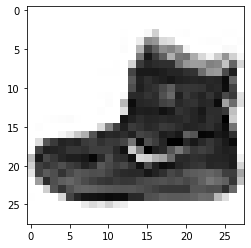

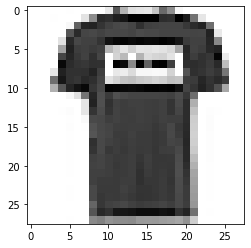

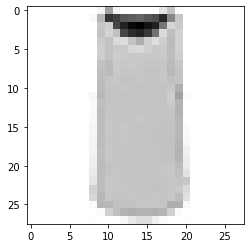

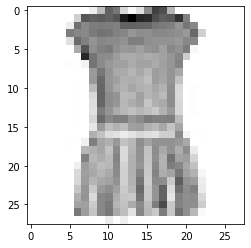

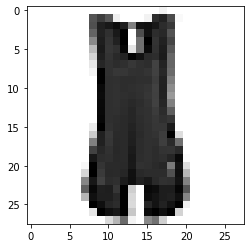

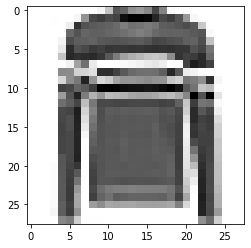

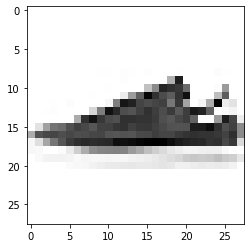

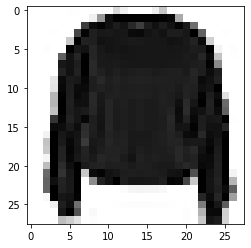

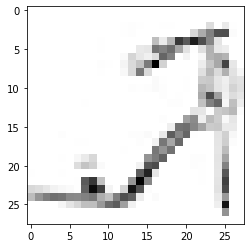

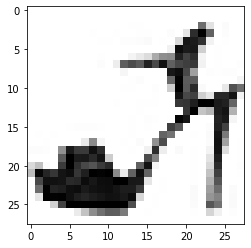

In [119]:
# print the first 10 images to see what data we are working with
# print the first 10 images in black and white color
for i in range(10):
    plt.imshow(train_images[i], cmap='Greys')
    plt.show()

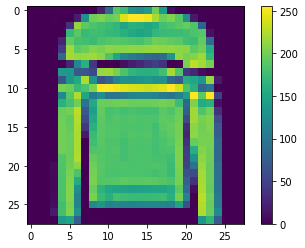

In [120]:
# see details of a single image
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()


In [121]:
# Scale pixel values to a range of 0 to 1 before feeding them to the neural network model
# by dividing them by 255
train_images = train_images / 255.0

test_images = test_images / 255.0

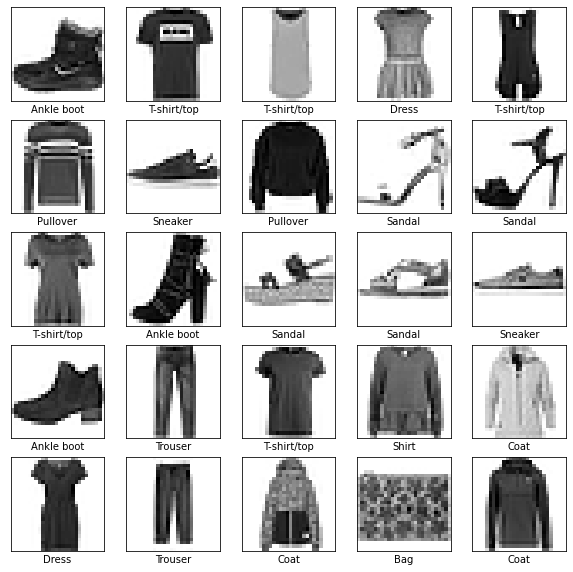

In [122]:
# print first 25 images to verify if they are in the correct format

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [123]:
# Setting up the layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [124]:
# Compile the models
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [125]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 697us/step - loss: 0.4970 - accuracy: 0.8265

In [126]:
# Evaluate the accuracy and loss of the model in the test model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3331 - accuracy: 0.8867

Test accuracy: 0.8866999745368958


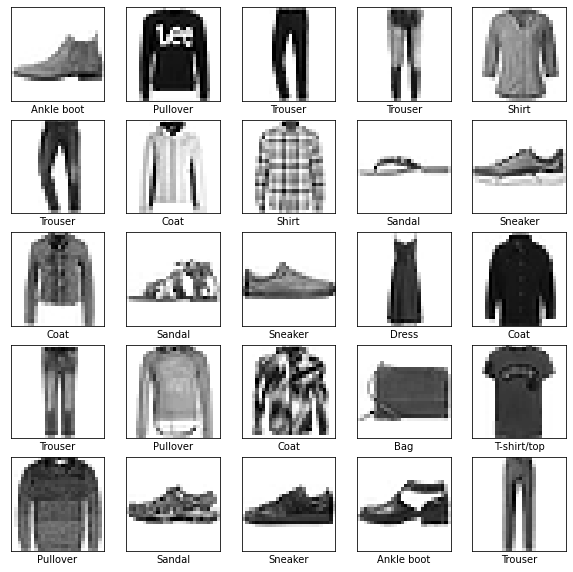

In [127]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [128]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [129]:
predictions = probability_model.predict(test_images)

In [130]:
predictions[0]

array([2.7479047e-07, 3.7181437e-08, 2.8674472e-09, 3.4882504e-09,
       3.0519232e-08, 2.0119816e-02, 6.8110444e-06, 1.6276615e-02,
       4.8305937e-09, 9.6359640e-01], dtype=float32)

In [131]:
np.argmax(predictions[0])

9

In [132]:
test_labels[0]

9

In [133]:
# Graph all 10 class predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color = color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

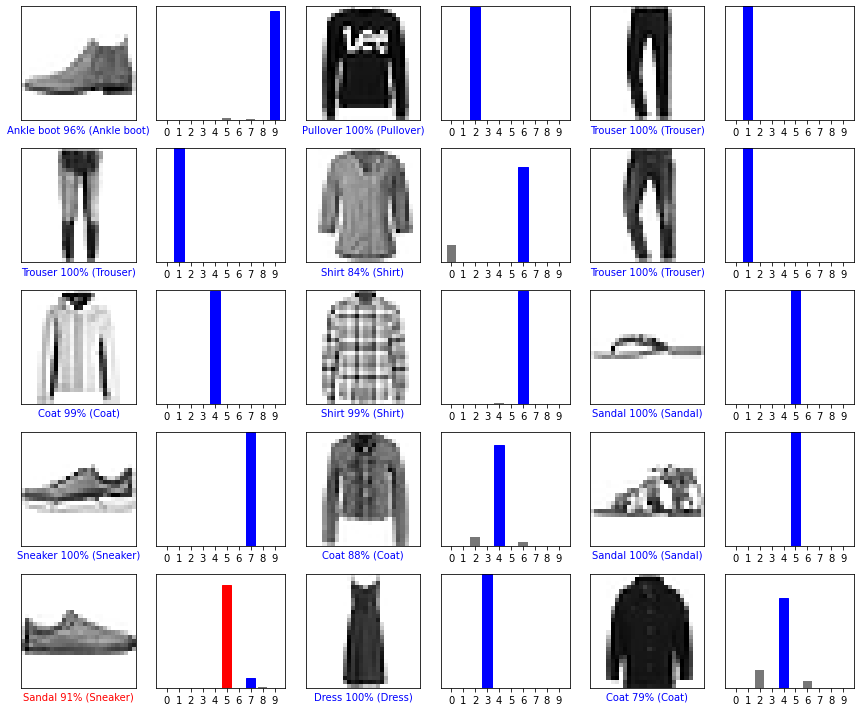

In [134]:
# Plot the first 15 test images, their predicted labels, and the true labels
# Color correct predictions in blue and incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()